In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rd
tf.compat.v1.disable_eager_execution()
import cv2
import os 
import json

In [3]:
model = tf.keras.applications.vgg16.VGG16(weights="imagenet")
image_dir = "C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\elephanat_image.jpeg"
image = tf.keras.preprocessing.image.load_img(image_dir, target_size=(224, 224))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)
image_tensor = np.expand_dims(image_tensor, axis=0)
image_tensor = tf.keras.applications.vgg16.preprocess_input(image_tensor)

model_prediction = model.predict(image_tensor)
#print(model_prediction, model_prediction.shape)
#print(f"ELEPHANT MARK PREDCITED: [{np.argmax(model_prediction)}]")
#print(f"DECODE PREDICTION RESULT: \
#      ![{tf.keras.applications.vgg16.decode_predictions(model_prediction, top=3)}]!")

model.summary()


c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

[<tf.Tensor 'gradients_1/block5_pool/MaxPool_grad/MaxPoolGrad:0' shape=(None, 14, 14, 512) dtype=float32>]
Tensor("block5_conv3/Relu:0", shape=(None, 14, 14, 512), dtype=float32)


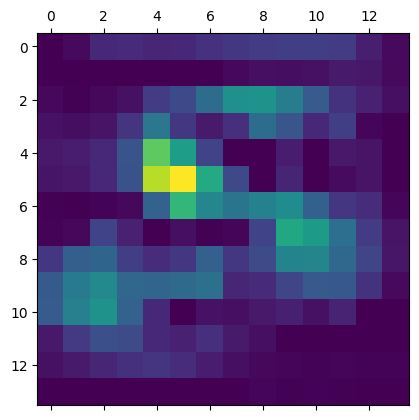

In [4]:
african_elephant_output = model.output[:, 386]

last_conv_layer = model.get_layer("block5_conv3")
grads = tf.keras.backend.gradients(african_elephant_output, last_conv_layer.output)[0]
print(tf.keras.backend.gradients(african_elephant_output, last_conv_layer.output))
pooled_grads = tf.keras.backend.mean(grads, axis=(0, 1, 2))

print(last_conv_layer.output)
iterate = tf.keras.backend.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([image_tensor])

for iteration in range(512):
    conv_layer_output_value[:, :, iteration] *= pooled_grads_value[iteration]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [5]:
img = cv2.imread(image_dir)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite("C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\elephant_frame.jpg", superimposed_img)


True

[[9.64542557e-10 5.43936416e-08 6.89648743e-07 1.90407661e-07
  5.22459374e-08 4.50919124e-09 1.32686473e-09 1.93489456e-08
  2.94599811e-08 2.31120705e-08 9.73652377e-08 8.16487642e-08
  4.18168007e-08 1.16390493e-06 4.59897151e-08 5.62879677e-07
  1.16325296e-07 2.72225122e-07 3.36746560e-08 9.70674421e-08
  3.61762659e-07 1.40454244e-08 1.57350911e-07 1.70007048e-08
  4.53383876e-07 1.07914540e-08 1.42593173e-08 1.36821185e-08
  1.36235201e-09 4.31301395e-08 1.18455405e-08 1.04343094e-08
  5.01877029e-09 1.51056927e-08 9.44483105e-08 5.91924332e-09
  3.65622093e-08 7.98838051e-10 9.83157999e-09 2.77151848e-08
  1.61785636e-07 3.03671954e-09 8.12071743e-09 6.00736030e-08
  2.65113655e-08 1.85190405e-08 9.95660727e-08 2.95168290e-09
  1.26154776e-08 6.45029417e-08 5.20668735e-08 1.71542833e-08
  9.98663374e-09 4.37144987e-09 1.04561453e-08 4.64949856e-09
  2.40701281e-09 7.35423589e-09 2.50840877e-08 6.65915900e-09
  2.04714752e-08 2.76938739e-09 1.61108943e-07 1.83245497e-09
  3.7522

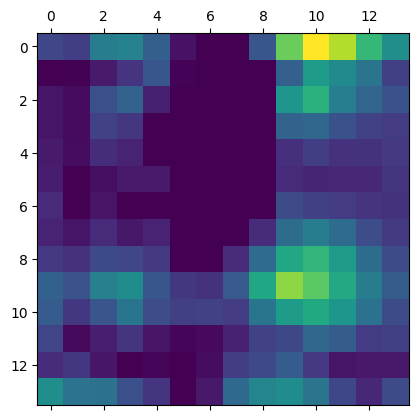

In [6]:
dog_image_example = tf.keras.preprocessing.image.load_img("C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\dog_example.jpeg", target_size=(224, 224))
dog_image_tensor = tf.keras.preprocessing.image.img_to_array(dog_image_example)
dog_image_tensor = np.expand_dims(dog_image_tensor, axis=0)

print(model.predict(dog_image_tensor))
dog_prediction = np.argmax(model.predict(dog_image_tensor))
dog_model_output = model.output[:, dog_prediction]

gradients = tf.keras.backend.gradients(dog_model_output, last_conv_layer.output)[0]
pooled_grads = tf.keras.backend.mean(gradients, axis=(0, 1, 2))

iterate = tf.keras.backend.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([dog_image_tensor])

for iteration in range(512):
    conv_layer_output_value[:, :, iteration] *= pooled_grads_value[iteration]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

plt.matshow(heatmap)

In [7]:
dog_img = cv2.imread("C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\dog_example.jpeg")
heatmap = cv2.resize(heatmap, (dog_img.shape[1], dog_img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

result_image = heatmap + 0.4 * dog_img
cv2.imwrite("C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\dog_example_heatmap.jpg", result_image)


True

In [8]:
octobus_image = tf.keras.preprocessing.image.load_img("C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\octobus.jpg", target_size=(224, 224))
octobus_image_tensor = tf.keras.preprocessing.image.img_to_array(octobus_image)
octobus_image_tensor = np.expand_dims(octobus_image_tensor, axis=0)

oct_model_prediction = model.predict(octobus_image_tensor)
oct_model_out = model.output[:, np.argmax(oct_model_prediction)]

grads = tf.keras.backend.gradients(oct_model_out, last_conv_layer)[0]
grads_pooled = tf.keras.backend.mean(grads, axis=(0, 1, 2))

iterate = tf.keras.backend.function([model.input], [grads_pooled, last_conv_layer[0]])
pooled_grads_value, conv_layer_output_value = iterate([octobus_image_tensor])

for iteration in range(512):
    conv_layer_output_value[:, :, iteration] *= pooled_grads_value[iteration]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


oct_img = cv2.imread("C:\\Users\\1\\Desktop\\reinforcment_deep_ML\\octobus.jpg")
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.resize(heatmap, (oct_img.shape[1], oct_img.shape[0]))
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_BONE)

result = heatmap * 0.4 + oct_img

plt.imshow(result)


TypeError: Failed to convert elements of <keras.layers.convolutional.conv2d.Conv2D object at 0x00000153FEBE4A90> to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.